## Final Project Submission

Please fill out:
* Student name: Anthony Kiarie Nene
* Student pace: part time
* Scheduled project review date/time: 15th December 2022, 12.00 a.m
* Instructor name: Asha Deen, Noah Kandie, Rose Delilah
* Blog post URL:


# Introduction

In this project, we set to understand the housing market in King County to establish the factors that determine the pricing of the houses.
We will analyse the data provided and give recommendations  to the various stakeholders on how to optimize the prices while offering quality housing 
Specifically, we will set to determine whether the grading, condition and what other factors significantly affect the house prices

### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [249]:
# we start by importing the necessary libarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [250]:
#lets load and view our data from the CSV file
df_housing = pd.read_csv('/Users/user/Phase2_Project/dsc-phase-2-project/data/kc_house_data.csv')
df_housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [251]:
#view the columns of our data set
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [252]:
#we now check the data type and overview of its structure
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [253]:
#the date column has to be converted to date format
df_housing['date'] = pd.to_datetime(df_housing['date'])

In [254]:
#checking for null values
df_housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [255]:
#we will replace all the missing values with 0 rather than dropping the columns entirely
df_housing = df_housing.fillna(0)
df_housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [256]:
#we'll also check for duplicates and drop them
df_housing.duplicated().value_counts()

False    21597
dtype: int64

In [257]:
# let's create a new data set with columns that migt be affect a change in price
new_df_housing = df_housing[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'grade','condition','yr_built', 'yr_renovated','sqft_lot15']]
new_df_housing


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,condition,yr_built,yr_renovated,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,7,3,1955,0.0,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,7,3,1951,1991.0,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,6,3,1933,0.0,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,7,5,1965,0.0,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,8,3,1987,0.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,8,3,2009,0.0,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,8,3,2014,0.0,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,7,3,2009,0.0,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,8,3,2004,0.0,1287


### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

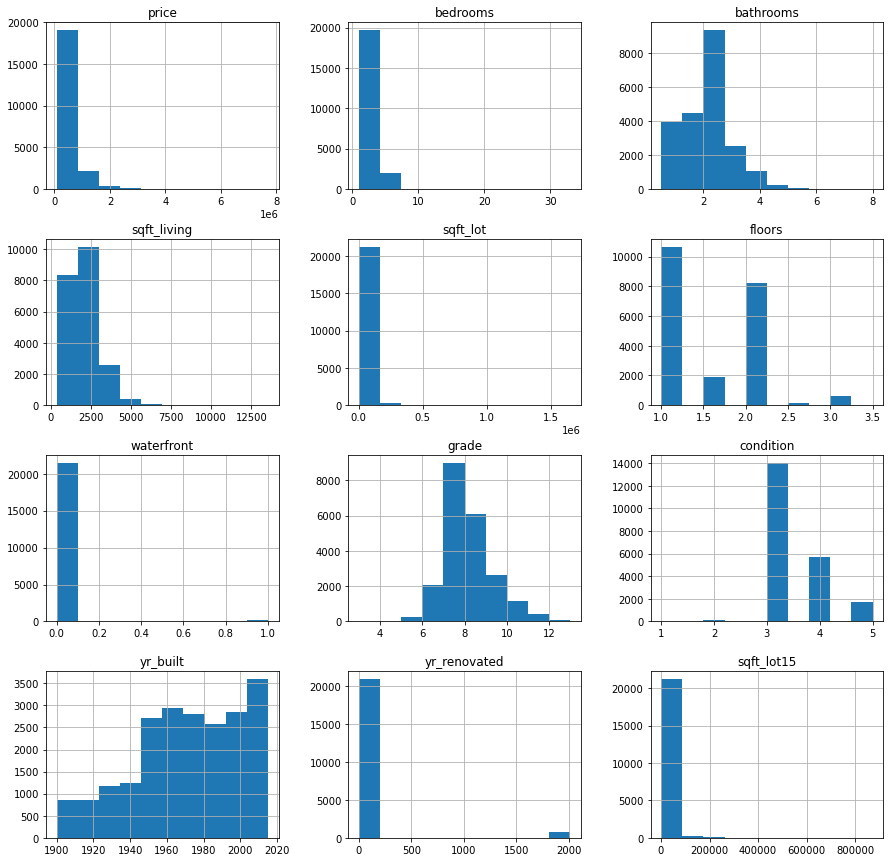

In [258]:
new_df_housing.hist(figsize=(15,15));

In [259]:
# The grade bathroom and sqft living are continuous and appear to be normally distributed
# There has been an increase in houses being bult as the years progress i.e most houses were built from 2000 onwards
# Most houses have between one and three bathrooms

### Check the linearity assumption for the chosen features with the price using scatter plots

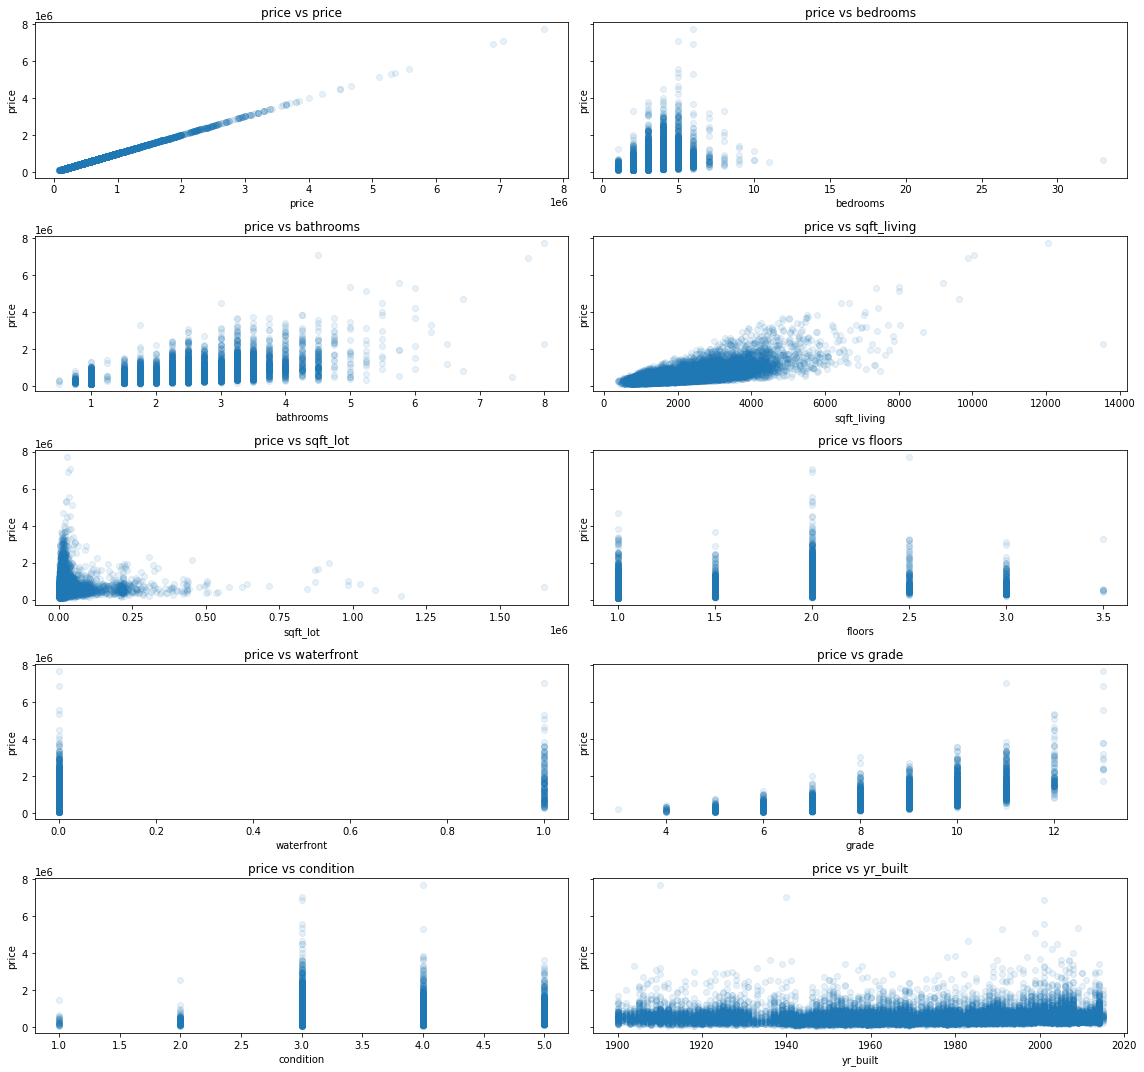

In [260]:
#in the below code, we iterate through each column of data and through each of our axes making a plots for each variable

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), new_df_housing.columns):
    ax.scatter(new_df_housing[column], new_df_housing['price'], label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('price')

fig.tight_layout()

In [261]:
# Let's change the year renovated column into binary data, where 0 means not renovated and 1 means renovated
new_df_housing['renovation'] =  new_df_housing['yr_renovated'].map(lambda x : 0 if x == 0 else(1) ) 
new_df_housing['renovation']


0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: renovation, Length: 21597, dtype: int64

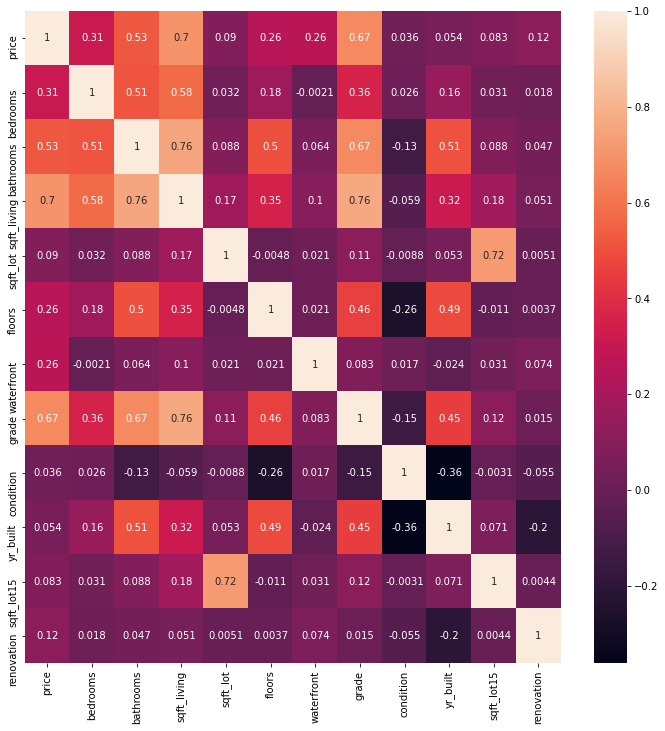

In [276]:
# Let's check for correlation between the above selected variables and the price
new_df_housing.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(new_df_housing.corr(), annot=True);
plt.savefig('picture/heatmap.png')

In [263]:
# From the above we can assume that there's a high likelihood that an increase in the-
#sqft_living will lead to high prices given their correlation is 0.7
# We can als say that as the sqft_living increases, so does the number of bathrooms since both have a correlation of 0.76

#### We will then proceed to split our data for testing and training afterwards

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
#We have identified the price as our target variable
main_y = new_df_housing['price']
train1 = new_df_housing.drop(['yr_renovated','price'],axis=1)
train1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,condition,yr_built,sqft_lot15,renovation
0,3,1.00,1180,5650,1.0,0.0,7,3,1955,5650,0
1,3,2.25,2570,7242,2.0,0.0,7,3,1951,7639,1
2,2,1.00,770,10000,1.0,0.0,6,3,1933,8062,0
3,4,3.00,1960,5000,1.0,0.0,7,5,1965,5000,0
4,3,2.00,1680,8080,1.0,0.0,8,3,1987,7503,0


#### Let's check for the distribution of our varibles to see how each variable is related to the other

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [267]:
reg = LinearRegression()
train1 = new_df_housing.drop(['price'],axis=1)
main_y = new_df_housing['price']#price predictor
# Now we know that prices are to be predicted , hence we set main_y (output) as price columns
# We use 0 for houses which are new that is built after 2014
train1 = new_df_housing.drop(['price'],axis=1)
train1
# My
# My train data is 80% and 20% of the data ratio , 
# and I randomized the splitting of data by using random_state.
x_train , x_test , y_train , y_test = train_test_split(train1 , main_y , test_size = 0.20,random_state =2)
reg.fit(x_train,y_train)
reg.score(x_test,y_test)
y_pred1 = reg.predict(x_test)
y_pred1

print(reg.fit(x_train,y_train))
print(reg.score(x_test,y_test))
print(reg.score(x_train,y_train))

LinearRegression()
0.6410112081171891
0.648244200302348


In [268]:
model = sm.OLS(y_train, x_train).fit() ## sm.OLS(output, input)
predictions = model.predict(x_test)

# Print out the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          1.033e+04
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                        02:26:41   Log-Likelihood:                     -2.3764e+05
No. Observations:               17277   AIC:                                  4.753e+05
Df Residuals:                   17265   BIC:                                  4.754e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
bedrooms     -3.236e+04   2353.804    -13.748      0.000    -3.7e+04   -2.77e+04
bathrooms    -9060.6094   3820.278     -2.372      0.018   -1.65e+04   -1572.478
sqft_living    190.0707      3.836     49.549      0.000     182.552     197.590
sqft_lot         0.0142      0.062      0.230      0.818      -0.107       0.135
floors       -1.247e+04   3969.028     -3.142      0.002   -2.02e+04   -4689.073
waterfront    8.594e+05   2.15e+04     39.948      0.000    8.17e+05    9.02e+05
grade         1.203e+05   2502.743     48.062      0.000    1.15e+05    1.25e+05
condition     6.545e+04   2725.447     24.016      0.000    6.01e+04    7.08e+04
yr_built      -434.6349      9.833    -44.201      0.000    -453.909    -415.361
yr_renovated  3087.5970    603.758      5.114      0.000    1904.171    4271.023
sqft_lot15      -0.6104      0.095     -6.453      0.000      -0.796      -0.425
renovation   -6.018e+06   1.21e+06     -4.993      0.000   -8.38e+06   -3.66e+06
==============================================================================
Omnibus:                    11476.325   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           501709.434
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      28.872   Cond. No.                     3.47e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [269]:
#from the above results, we will have to drop the sqft_lot column as it is insignificant judging from it's p- value
new_df_housing = new_df_housing.drop(columns=['yr_renovated'], axis=1)

In [270]:
#let's build our new model
reg = LinearRegression()
train1 = new_df_housing.drop(['price'],axis=1)
main_y = new_df_housing['price']#price predictor
# Now we know that prices are to be predicted , hence we set main_y (output) as price columns
# We use 0 for houses which are new that is built after 2014
train1 = new_df_housing.drop(['price'],axis=1)
train1
# My
# My train data is 80% and 20% of the data ratio , 
# and I randomized the splitting of data by using random_state.
x_train , x_test , y_train , y_test = train_test_split(train1 , main_y , test_size = 0.20,random_state =2)
reg.fit(x_train,y_train)
reg.score(x_test,y_test)
y_pred1 = reg.predict(x_test)
y_pred1

print(reg.fit(x_train,y_train))
print(reg.score(x_test,y_test))
print(reg.score(x_train,y_train))

LinearRegression()
0.6403063635849313
0.6476788829949622


In [271]:
model = sm.OLS(y_train, x_train).fit() ## sm.OLS(output, input)
predictions = model.predict(x_test)

# Print out the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          1.125e+04
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                        02:26:41   Log-Likelihood:                     -2.3765e+05
No. Observations:               17277   AIC:                                  4.753e+05
Df Residuals:                   17266   BIC:                                  4.754e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -3.215e+04   2355.164    -13.651      0.000   -3.68e+04   -2.75e+04
bathrooms   -8244.9791   3819.726     -2.159      0.031   -1.57e+04    -757.928
sqft_living   189.4919      3.837     49.384      0.000     181.971     197.013
sqft_lot        0.0107      0.062      0.174      0.862      -0.110       0.131
floors      -1.328e+04   3968.764     -3.346      0.001   -2.11e+04   -5498.322
waterfront   8.551e+05   2.15e+04     39.748      0.000    8.13e+05    8.97e+05
grade        1.207e+05   2503.365     48.209      0.000    1.16e+05    1.26e+05
condition    6.477e+04   2724.152     23.776      0.000    5.94e+04    7.01e+04
yr_built     -434.9651      9.840    -44.203      0.000    -454.253    -415.677
sqft_lot15     -0.6093      0.095     -6.436      0.000      -0.795      -0.424
renovation   1.453e+05   9483.461     15.327      0.000    1.27e+05    1.64e+05
==============================================================================
Omnibus:                    11483.381   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           502961.518
Skew:                           2.627   Prob(JB):                         0.00
Kurtosis:                      28.905   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary

We used multiple regression analysis to test if certain variables significantly predicted the sale price of homes in King County. The results of the regression indicated that 9 predictors  explained 87.7% of the variance (R2= 0.877, p< 0.01). With p- values of less than 0.05, all the independent variables in our model above were significant predictors.

renovation
0    449000.0
1    607502.0
Name: price, dtype: float64


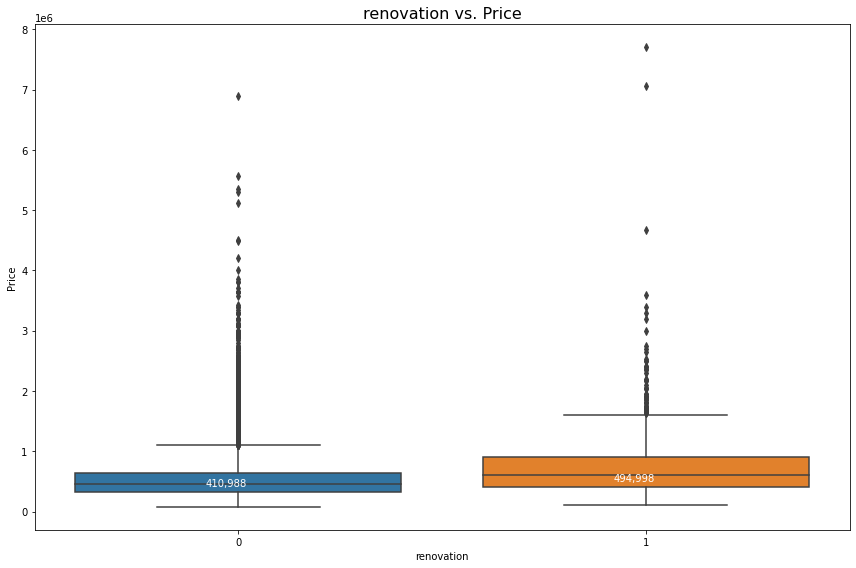

In [274]:
# From the above model we can test and visualize the results of a few predictors' effects on price.
# let's begin by comparing whether renovation affects house prices
print(new_df_housing.groupby(['renovation'])['price'].median())

#Plot renovation vs. price
plt.figure(figsize=(12, 8))
sns.boxplot(new_df_housing.renovation, new_df_housing.price)
plt.title('renovation vs. Price', fontsize=16)
plt.xlabel('renovation')
plt.ylabel('Price')
plt.text(x=-0.08, y=425000, s='410,988', c='white', fontsize=10)
plt.text(x=0.92, y=510000, s='494,998', c='white', fontsize=10)
plt.tight_layout()
plt.savefig('picture/RenPrice.png')
plt.show()

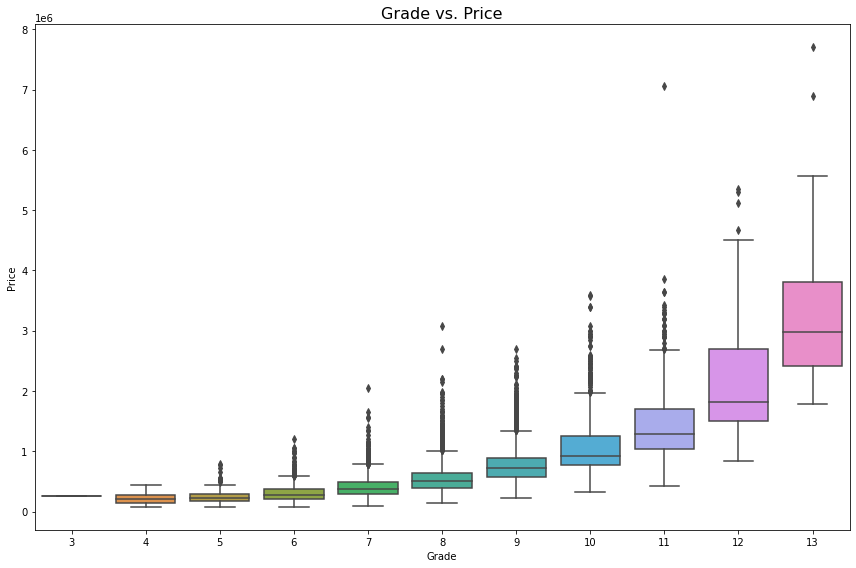

In [275]:
#let's also check the effect of grading on the house prices
plt.figure(figsize=(12, 8))
sns.boxplot(new_df_housing.grade, new_df_housing.price)
plt.title('Grade vs. Price', fontsize=16)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig('picture/GradPrice.png')
plt.show()

### Conclusion
* We can conclude that the price of renovated houses is 84,000 more than houses that have not been renovated
* The higher the grading of a house, the higher the price of the house

### Recommendations
For stake holders to maximize on sales of their houses they have to ensure that:
* Houses are renovated as soon as they show any signs of dilapidation
* The houses earn a high grading from the municipality as this has been seen to have an effect on pricing